In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# プロットの調整
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='sans-serif')
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
d = pd.read_csv("gaia_sunlike_1kpc.csv")

In [3]:
m = np.array(d["gaia_magnitude"])

In [4]:
# 2. 累積分布が平らになる等級と対応する距離
M = 4.7 # 太陽の絶対等級
m_flat = 14.7 # 平らになる等級
d_max_pc = 10 * 10**(0.2*(m_flat-M))
print(d_max_pc)

1000.0


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qp/91qlh0v11sb02z6vb4nb_s0m0000gn/T/ipykernel_89523/35630889.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("cumulative distribution $\mathcal{F}(m)$")
/var/folders/qp/91qlh0v11sb02z6vb4nb_s0m0000gn/T/ipykernel_89523/35630889.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x=m_flat, ls='dashed', color='gray', label='$d\sim 1\,\mathrm{kpc}$')


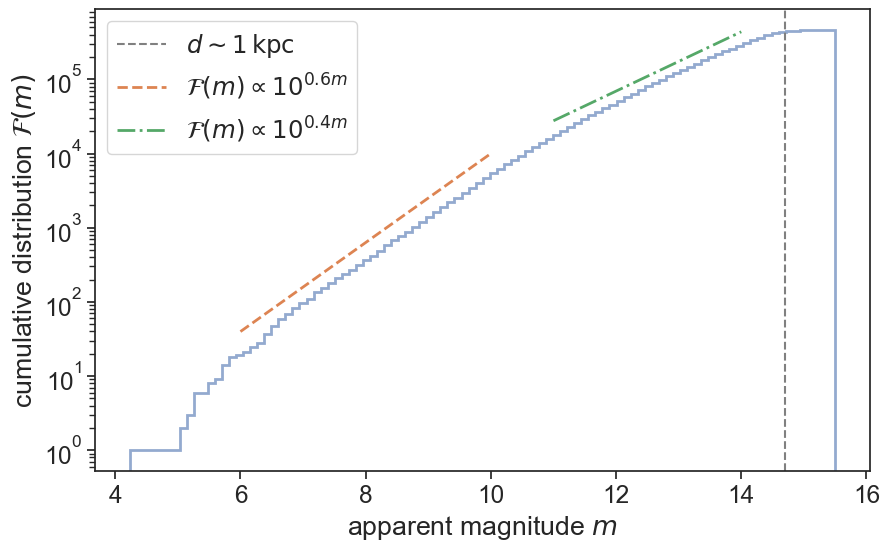

In [5]:
plt.ylabel("cumulative distribution $\mathcal{F}(m)$")
plt.xlabel("apparent magnitude $m$")
plt.yscale("log")
plt.hist(m, cumulative=True, bins=100, histtype='step', lw=2, alpha=0.6) # 累積分布

plt.axvline(x=m_flat, ls='dashed', color='gray', label='$d\sim 1\,\mathrm{kpc}$')

x = np.linspace(6, 10, 100)
plt.plot(x, 10**(0.6*x)*0.01, label=r'$\mathcal{F}(m) \propto 10^{0.6m}$', ls='dashed', lw=2)

x = np.linspace(11, 14, 100)
plt.plot(x, 10**(0.4*x)*1.1, label=r'$\mathcal{F}(m) \propto 10^{0.4m}$', ls='-.', lw=2)

plt.legend(loc='best');

### $\mathcal{F}(m) \propto 10^{0.6m}$, $\mathcal{F}(m) \propto 10^{0.4m}$の意味

$\mathcal{F}(m)$は見かけの等級が$m$より小さい（つまりそれより明るい）恒星の数である。ここでは真の明るさに対応する絶対等級$M$が等しい恒星を選んでいるので、見かけの等級が$m$より小さいということは、恒星までの距離が
$$
d_m = 10 \cdot 10^{0.2(m - M)}\,\mathrm{pc}
$$
より近いということである。もし<u>恒星が宇宙空間に一様に分布しているとすると</u>、距離が$d_m$より近い恒星の数は
$$
\mathcal{F}(m) \propto d_m^3
$$
となるはずである。これに上の$d_m$の式を代入すると、
$$
\mathcal{F}(m) \propto 10^{0.6(m - M)}
$$
が出てくる。

では$\mathcal{F}(m) \propto 10^{0.4m}$となるのはどんなときか？　上の計算から、こうなるのは
$$
\mathcal{F}(m) \propto d_m^2
$$
となるときである。つまり、恒星が2次元の平面内に一様に分布している場合に対応する。

太陽系の属する銀河系の円盤はある一定の厚みを持っている。厚みより小さい距離を観測している場合、周囲の恒星は3次元的に一様に分布するので、おおよそ$\mathcal{F}(m)\propto d_m^3$となるが、円盤の厚みより遠くまで観測し始めると恒星の分布が2次元的になり、$\mathcal{F}(m)\propto d_m^2$に切り替わると考えられる。